In [94]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

data = pd.read_excel('Feminicidio_2015_2022.xlsx', sheet_name = 7)
data.drop(columns=['LATITUDE', 'LONGITUDE', 'DEPARTAMENTO_CIRCUNSCRICAO', 
                   'SECCIONAL_CIRCUNSCRICAO', 'ID_DELEGACIA', 'NUM_BO', 
                   'DP_ELABORACAO', 'SEC_ELABORACAO', 'DEP_ELABORACAO', 
                   'NUMERO_LOGRADOURO', 'SEXO_PESSOA', 'DESDOBRAMENTO',
                   'HD', 'ANO ESTATISTICA', 'NATUREZA_APURADA'], inplace = True)
data['PROFISSAO'] = data['PROFISSAO'].fillna('NAO INFORMADA')

city_filter = data['MUNICIPIO_CIRCUNSCRICAO'] == 'São Paulo'
street_filter = data['LOGRADOURO'] != data[city_filter]['LOGRADOURO'][0]
all_data = city_filter & street_filter

data.head()

/usr/local/lib/python3.9/dist-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)


,MUNICIPIO_CIRCUNSCRICAO,DP_CIRCUNSCRICAO,Nº DE VÍT HD,MÊS ESTATISTICA,DATAHORA_REGISTRO_BO,ANO_BO,MUNICIPIO_ELABORACAO,DATA_FATO,HORA_FATO,DESC_TIPOLOCAL,LOGRADOURO,TIPO_PESSOA,IDADE_PESSOA,DATA_NASCIMENTO_PESSOA,COR_PELE,PROFISSAO
0,São Paulo,054 DP - Cidade Tiradentes,1,1,2022-01-30 16:02:00,2022,S.PAULO,2022-01-30,09:31:00,Residência,DA VEDAÇÃO DA DIVULGAÇÃO DOS DADOS RELATIVOS,Vítima,58.0,1963-08-01,Branca,NAO INFORMADA
1,São Paulo,103 DP - Cohab Itaquera,1,1,2022-01-04 00:00:00,2022,S.PAULO,2022-01-04,04:19:00,Residência,DA VEDAÇÃO DA DIVULGAÇÃO DOS DADOS RELATIVOS,Vítima,77.0,1944-06-22,Branca,NAO INFORMADA
2,São Paulo,018 DP - Alto da Moóca,1,1,2022-01-10 11:25:00,2022,S.PAULO,2022-01-10,PELA MANHÃ,Via pública,RUA MARINA CRESPI,Vítima,51.0,1970-06-07,Parda,NAO INFORMADA
3,São Paulo,074 DP - Jaraguá,1,1,2022-01-04 00:00:00,2022,S.PAULO,2022-01-03,23:57:00,Residência,DA VEDAÇÃO DA DIVULGAÇÃO DOS DADOS RELATIVOS,Vítima,47.0,1974-01-28,Parda,AUXILIAR DE LIMPEZA
4,Campinas,009 DP - Campinas,1,1,2022-01-18 00:00:00,2022,CAMPINAS,2022-01-18,DE MADRUGADA,Residência,DA VEDAÇÃO DA DIVULGAÇÃO DOS DADOS RELATIVOS,Vítima,3.0,2018-11-13,Branca,NAO INFORMADA


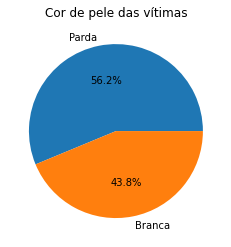

In [95]:
skin_color = data[all_data]['COR_PELE'].value_counts()
plt.pie(skin_color.values, labels = skin_color.index, autopct='%1.1f%%')
plt.title('Cor de pele das vítimas')
plt.show()

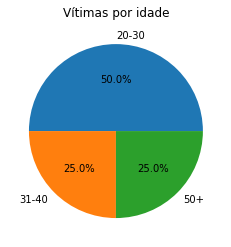

In [96]:
age_values = [0, 0, 0]
age_labels = ['20-30', '31-40', '50+']
for i in data[all_data]['IDADE_PESSOA']:
  if i <= 30:
    age_values[0] += 1
  elif i <= 40:
    age_values[1] += 1
  else:
    age_values[2] += 1

plt.pie(age_values, labels = age_labels, autopct='%1.1f%%')
plt.title('Vítimas por idade')
plt.show()

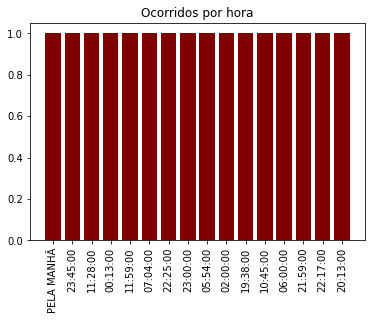

In [97]:
time = data[all_data]['HORA_FATO'].value_counts()
plt.bar(list(map(str, time.index)), time.values, color ='maroon')
plt.xticks(rotation=90)
plt.title('Ocorridos por hora')
plt.show()

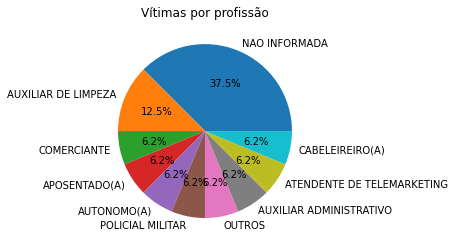

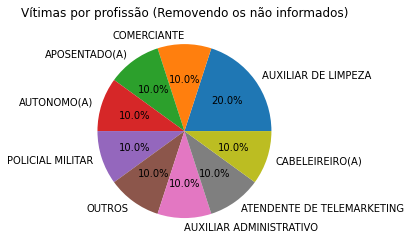

In [111]:
profession = data[all_data]['PROFISSAO'].value_counts()
plt.pie(profession.values, labels = profession.index, autopct='%1.1f%%')
plt.title('Vítimas por profissão')
plt.show()

print("\n\n")

treated = data[all_data]['PROFISSAO'] != 'NAO INFORMADA'
profession = data[all_data & treated]['PROFISSAO'].value_counts()
plt.pie(profession.values, labels = profession.index, autopct='%1.1f%%')
plt.title('Vítimas por profissão (Removendo os não informados)')
plt.show()